# Plot 1xs result as a function for PhT, for different z(in one plot, separate by color and offset) per Q2 bins, for one phih bin(-Pi to Pi), so there are lots of PhT bins

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import lhapdf
import yaml

In [2]:

def Get_weighted_average(value,error):
    Factor=1#(0.3894*1e6)
    sum_mean = 0
    sum_sigma = 0
    #print(value,error)
    for i in range(len(value)):
        #print(i,value[i],error[i])
        sum_mean += Factor*value[i]/((Factor)**2*error[i]**2)
        sum_sigma += 1/(Factor**2*error[i]**2)
    if sum_sigma!=0:
        return sum_mean/sum_sigma,math.sqrt(1/sum_sigma)
    else:
        return -1,0
def Get_weighted_average_phi(value,error):
    sum_mean = 0
    sum_sigma = 0
    #print(value,error)
    for i in range(len(value)):
        #print(i,value[i],error[i])
        sum_mean += value[i]/(error[i]*error[i])
        sum_sigma += 1/(error[i]*error[i])
    if sum_sigma!=0:
        return sum_mean/sum_sigma,math.sqrt(1/sum_sigma)
    else:
        return -1,0

In [3]:
df_3xs_x1_11_zQ2xbjPhT = pd.read_csv('Materials/results_June2024/onephi_Sep/MAP24/Report.csv',delim_whitespace=True)
df_3xs_x1_11_zQ2xbjPhT.head()


,i,Ebeam,x,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0,11,0.125005,0,0.375,1.75,0.06605,FUUT,4577.754028,32.26060,0,0,He3,pi+,solid,0
1,1,11,0.125005,0,0.375,1.75,0.12571,FUUT,4363.667348,32.42766,0,0,He3,pi+,solid,0
2,2,11,0.125005,0,0.375,1.75,0.17527,FUUT,4121.018504,28.37815,0,0,He3,pi+,solid,0
3,3,11,0.125005,0,0.375,1.75,0.22594,FUUT,3829.933007,27.43079,0,0,He3,pi+,solid,0
4,4,11,0.125005,0,0.375,1.75,0.27527,FUUT,3510.131704,26.82646,0,0,He3,pi+,solid,0


In [4]:
PI = math.pi
print(PI)
#z_cuts=[0.3,0.4,0.5,0.6]
z_cuts=[0.3,0.4,0.5,0.6,0.7]
Q2_cuts=[1,2,4,6,20]
#Q2_cuts=[2,4,6,10,20]
#Q2_cuts=[1,3,6,10,20]
xbj_cuts=[0,0.25,0.5,0.7]

#PhT_cuts=[0,0.1,0.2,0.3,0.4,0.6,0.8,1.6]
PhT_cuts=[0,0.1,0.2,0.3,0.4,0.45,0.5,0.55,0.6,0.7,0.8,1.6]
df_3xs_zQ2x_11 = df_3xs_x1_11_zQ2xbjPhT[(df_3xs_x1_11_zQ2xbjPhT['Ebeam']==11)]
df_3xs_zQ2_11=df_3xs_x1_11_zQ2xbjPhT[(df_3xs_x1_11_zQ2xbjPhT['Ebeam']==11)&(df_3xs_x1_11_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xs_x1_11_zQ2xbjPhT['x']<xbj_cuts[1])]


3.141592653589793


   i  Ebeam         x  y      z    Q2       pT   obs        value      stat   
0  0     11  0.125005  0  0.375  1.75  0.06605  FUUT  4577.754028  32.26060  \
1  1     11  0.125005  0  0.375  1.75  0.12571  FUUT  4363.667348  32.42766   
2  2     11  0.125005  0  0.375  1.75  0.17527  FUUT  4121.018504  28.37815   
3  3     11  0.125005  0  0.375  1.75  0.22594  FUUT  3829.933007  27.43079   
4  4     11  0.125005  0  0.375  1.75  0.27527  FUUT  3510.131704  26.82646   

   systrel  systabs target hadron Experiment  error  
0        0        0    He3    pi+      solid      0  
1        0        0    He3    pi+      solid      0  
2        0        0    He3    pi+      solid      0  
3        0        0    He3    pi+      solid      0  
4        0        0    He3    pi+      solid      0  
184
234
264
0


Text(0, 0.5, '${d \\bf{\\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]')

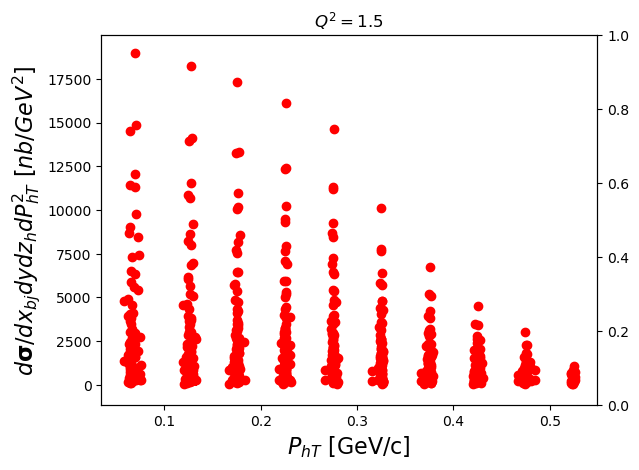

In [5]:
#plot for the Q2 bins
i_Q2=1
fig, ax = plt.subplots()
ax_right = ax.twinx()

df_3xs_z_11=df_3xs_zQ2_11[(df_3xs_zQ2_11['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2_11['Q2']<Q2_cuts[i_Q2])]
df_3xs_z_11=df_3xs_zQ2_11[(df_3xs_zQ2_11['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2_11['Q2']<Q2_cuts[i_Q2])]
print(df_3xs_z_11.head())
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['k','g','r','c','m','y','navy','purple']
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs_11=df_3xs_z_11[(df_3xs_z_11['z']>z_cuts[i_z-1])&(df_3xs_z_11['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus_11=df_3xs_11['value'].to_list()
    Fuu_stats_11=df_3xs_11['stat'].to_list()
    pTs_11=df_3xs_11['pT'].to_list()
    #legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    print(len(pTs_11))
    ax.scatter(pTs_11,Fuus_11, color=color[2])
    ax.errorbar(pTs_11,Fuus_11,Fuu_stats_11,color=color[2],ls='none')
    #zs_11=df_3xs_11['z'].to_list()
    #pTs_11=df_3xs_11['pT'].to_list()
    #ax_right.scatter(pTs_11,zs_11, color=color[0])

plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
ax.set_xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
ax.set_ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
#ax_right.set_ylabel(r'z',fontsize=16)

11
11
11
11


Text(0, 0.5, '${d \\bf{\\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]')

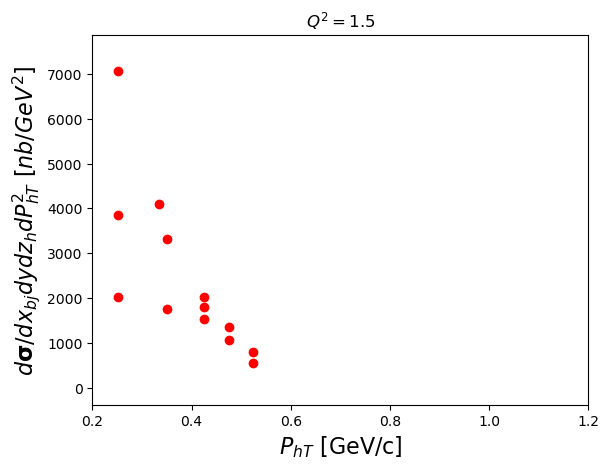

In [6]:
#plot for the Q2 bins
i_Q2=1
#file=open('Materials/results_June2024/onephi/numbers.txt','w')
#file.write('i,Ebeam,x,xl,xr,phih,phihl,phihr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
df_3xs_z_11=df_3xs_zQ2_11[(df_3xs_zQ2_11['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2_11['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['k','g','r','c','m','y','navy','purple']

for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs_11=df_3xs_z_11[(df_3xs_z_11['z']>z_cuts[i_z-1])&(df_3xs_z_11['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus_11=[]
    Fuu_stats_11=[]
    pTs_11=[]
    for i_PhT in range(1,len(PhT_cuts)):
        df_3xs_PhT_11=df_3xs_11[(df_3xs_11['pT']>PhT_cuts[i_PhT-1])&(df_3xs_11['pT']<PhT_cuts[i_PhT])]
        #print(len(df_3xs_PhT))
        
        _Fuu_11 = Get_weighted_average(df_3xs_PhT_11['value'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
        _Fuu_stat_11 = Get_weighted_average(df_3xs_PhT_11['value'].tolist(),df_3xs_PhT_11['stat'].tolist())[1]
        _pT_11= Get_weighted_average_phi(df_3xs_PhT_11['pT'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
        _z_11=Get_weighted_average_phi(df_3xs_PhT_11['z'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
        _Q2_11=Get_weighted_average_phi(df_3xs_PhT_11['Q2'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
        _x_11=Get_weighted_average_phi(df_3xs_PhT_11['x'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
        #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _y_11=Get_weighted_average_phi(df_3xs_PhT_11['y'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
        _sys = _Fuu_11*0.1
        
        Fuus_11.append(_Fuu_11)
        Fuu_stats_11.append(_Fuu_stat_11)
        pTs_11.append(_pT_11)
        
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    plt.errorbar(pTs_11,Fuus_11,Fuu_stats_11,color=color[2],ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
    print(len(pTs_11))
    plt.scatter(pTs_11,Fuus_11, color=color[2], label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])

plt.xlim(0.2,1.2)
#plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)

#file.close()

1
0.3
0.35
0.4
0.45
0.5
0.55
0.3
0.35
0.4
0.45
0.5
0.55
2
0.3
0.35
0.4
0.45
0.5
0.55
0.3
0.4
0.5
3
0.3
0.4
0.3
0.4


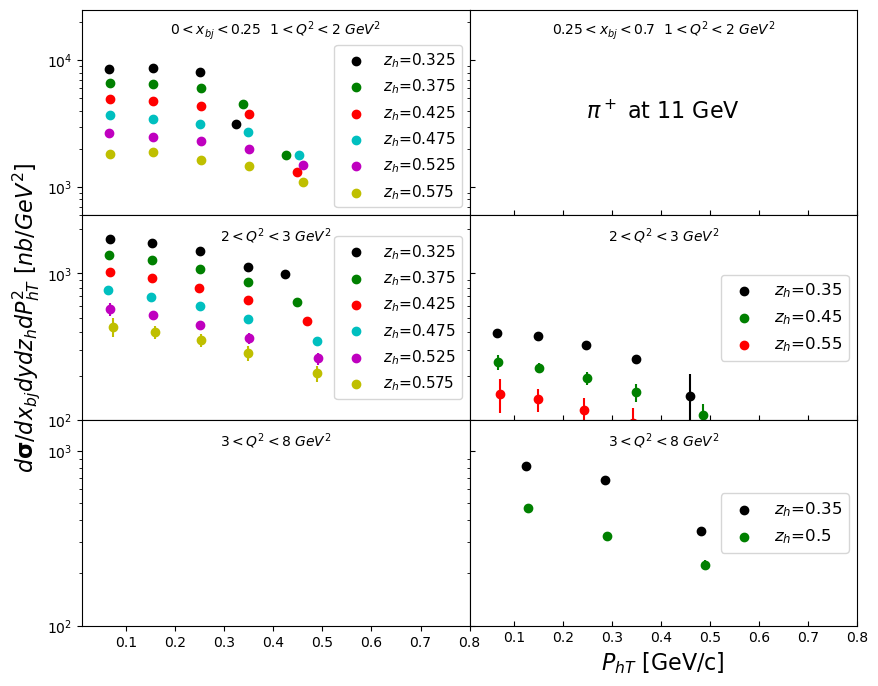

In [7]:
z_cuts=[0.3,0.35,0.4,0.45,0.5,0.55,0.6]
Q2_cuts=[1,2,3,8,20]
#Q2_cuts=[2,4,6,10,20]
#Q2_cuts=[1,3,6,10,20]
xbj_cuts=[0,0.25,0.7]

PhT_cuts=[0,0.1,0.2,0.3,0.4,0.6,0.8,1.6]
#PhT_cuts=[0,0.2,0.4,0.5,0.6,0.8,1.6]

fig, axs = plt.subplots(len(Q2_cuts)-2,len(xbj_cuts)-1,figsize=(10,8),sharex=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

Y_low=[600,100,100,1,1] 
Y_lim=[25111,2500,1490,590,99,100]
plt.xlabel('$P_{hT}$ [GeV/c]',fontsize=16)
plt.xlim(0.01,0.8)

for i_q2 in range(0,len(Q2_cuts)-2):
    print(Q2_cuts[i_q2])
    
    df_3xs_zx_11=df_3xs_zQ2x_11[(df_3xs_zQ2x_11['Q2']>Q2_cuts[i_q2])&(df_3xs_zQ2x_11['Q2']<Q2_cuts[i_q2+1])]
    
    #print(df_3xs_z_11['Q2'])
   
    for i_xbj in range(0,len(xbj_cuts)-1):
        
        df_3xs_z_11=df_3xs_zx_11[(df_3xs_zx_11['Ebeam']==11)&(df_3xs_zx_11['x']>xbj_cuts[i_xbj])&(df_3xs_zx_11['x']<xbj_cuts[i_xbj+1])]
        if Q2_cuts[i_q2]==2 and xbj_cuts[i_xbj]==0.25:
            z_cuts = [0.3,0.4,0.5,0.6]
        if Q2_cuts[i_q2]==3:
            z_cuts=[0.3,0.4,0.6]
            #PhT_cuts=[0,0.2,0.4,1.8]

        for i_z in range(0,len(z_cuts)-1):
            print(z_cuts[i_z])
            
            df_3xs_11=df_3xs_z_11[(df_3xs_z_11['z']>z_cuts[i_z])&(df_3xs_z_11['z']<z_cuts[i_z+1])]
            Fuus_11=[]
            Fuu_stats_11=[]
            pTs_11=[]
            for i_PhT in range(1,len(PhT_cuts)):
                df_3xs_PhT_11=df_3xs_11[(df_3xs_11['pT']>PhT_cuts[i_PhT-1])&(df_3xs_11['pT']<PhT_cuts[i_PhT])]
                #print(len(df_3xs_PhT))
        
                _Fuu_11 = Get_weighted_average(df_3xs_PhT_11['value'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
                _Fuu_stat_11 = Get_weighted_average(df_3xs_PhT_11['value'].tolist(),df_3xs_PhT_11['stat'].tolist())[1]
                _pT_11= Get_weighted_average_phi(df_3xs_PhT_11['pT'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
                _z_11=Get_weighted_average_phi(df_3xs_PhT_11['z'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
                _Q2_11=Get_weighted_average_phi(df_3xs_PhT_11['Q2'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
                _x_11=Get_weighted_average_phi(df_3xs_PhT_11['x'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
                #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _y_11=Get_weighted_average_phi(df_3xs_PhT_11['y'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
                _sys = _Fuu_11*0.1
                Fuus_11.append(_Fuu_11)
                Fuu_stats_11.append(_Fuu_stat_11)
                pTs_11.append(_pT_11)
               
            legend_11=r'$z_h$='+str(round((z_cuts[i_z]+z_cuts[i_z+1])/2,3))
            #if i_q2!=1 or i_xbj!=2  and Q2_cuts[i_q2]<9:
            if (i_q2==1 and i_xbj==2) or (i_q2==3):
                print('not add points')
                #legend_11='z='+str(round((z_cuts[i_z]+z_cuts[i_z+1])/2,3))
            else:
                axs[i_q2][i_xbj].errorbar(pTs_11,Fuus_11,Fuu_stats_11,color=color[i_z],ls='none')
                axs[i_q2][i_xbj].scatter(pTs_11,Fuus_11, color=color[i_z], label=legend_11)

            axs[i_q2][i_xbj].set_ylim(Y_low[i_q2],Y_lim[i_q2])
            axs[i_q2][i_xbj].set_yscale("log")
        if i_xbj>0 and i_q2>0:
            #axs[0][i_xbj].text(0.5,0.9,r'${}<x_{{bj}}<{}$'.format(xbj_cuts[i_xbj],xbj_cuts[i_xbj+1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][i_xbj].transAxes)
            axs[i_q2][0].text(0.5,0.9,r'${}<Q^2<{}$ $GeV^2$'.format(Q2_cuts[i_q2],Q2_cuts[i_q2+1]), horizontalalignment='center', verticalalignment='center', transform=axs[i_q2][0].transAxes)
            axs[i_q2][1].text(0.5,0.9,r'${}<Q^2<{}$ $GeV^2$'.format(Q2_cuts[i_q2],Q2_cuts[i_q2+1]), horizontalalignment='center', verticalalignment='center', transform=axs[i_q2][1].transAxes)
        
        if i_xbj>0 and i_q2<len(Q2_cuts)-1:
            axs[i_q2][i_xbj].tick_params(direction='in',labelleft=False)
axs[1][0].set_ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
axs[0][0].legend(fontsize=11,loc='lower right')
axs[1][0].legend(fontsize=11,loc='center right')
axs[1][1].legend(fontsize=12,loc='center right')
#axs[3][2].legend(fontsize=12)
axs[2][1].legend(fontsize=12,loc='center right')
axs[0][0].text(0.5,0.9,r'${}<x_{{bj}}<{}\      \   {}<Q^2<{}$ $GeV^2$'.format(xbj_cuts[0],xbj_cuts[1],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)
axs[0][1].text(0.5,0.9,r'${}<x_{{bj}}<{}\      \   {}<Q^2<{}$ $GeV^2$'.format(xbj_cuts[1],xbj_cuts[2],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][1].transAxes)
#axs[0][0].text(0.5,0.75,r'${}<x_{{b}}<{}$'.format(xbj_cuts[0],xbj_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)
axs[0][1].text(0.5,0.5,r'$\pi^+$ at 11 GeV ',fontsize = 16, horizontalalignment='center', verticalalignment='center', transform=axs[0][1].transAxes)
plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/MAP24/11_xQ2.pdf')    

1
0.3
0.35
0.4
0.45
0.5
0.55
0.3
0.35
0.4
0.45
0.5
0.55
1.5
0.3
0.35
0.4
0.45
0.5
0.55
0.3
0.35
0.4
0.45
0.5
0.55
2
0.3
0.35
0.4
0.45
0.5
0.55
0.3
0.35
0.4
0.45
0.5
0.55
2.5
0.3
not add points
0.4
not add points
0.5
not add points
0.3
not add points
0.4
not add points
0.5
not add points


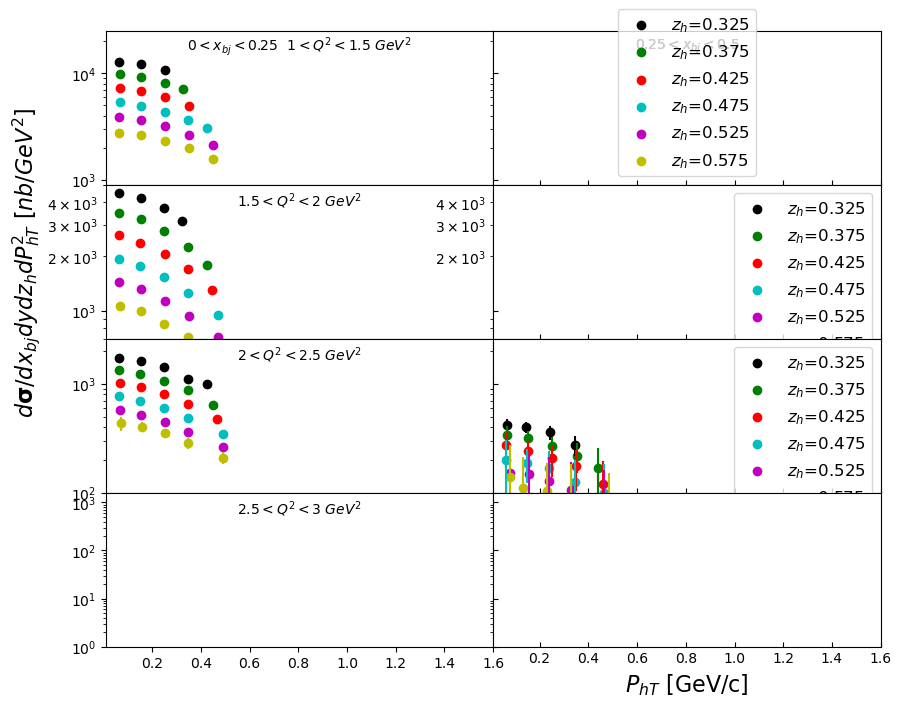

In [8]:

Q2_cuts=[1,1.5,2,2.5,3,8]
#Q2_cuts=[2,4,6,10,20]
#Q2_cuts=[1,3,6,10,20]
xbj_cuts=[0,0.25,0.5]
z_cuts=[0.3,0.35,0.4,0.45,0.5,0.55,0.6]
PhT_cuts=[0,0.1,0.2,0.3,0.4,0.6,0.8,1.6]
#PhT_cuts=[0,0.2,0.4,0.5,0.6,0.8,1.6]

fig, axs = plt.subplots(len(Q2_cuts)-2,len(xbj_cuts)-1,figsize=(10,8),sharex=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

Y_low=[900,700,100,1,1] 
Y_lim=[25111,5000,2590,1590,99,100]
plt.xlabel('$P_{hT}$ [GeV/c]',fontsize=16)
plt.xlim(0.01,1.6)

for i_q2 in range(0,len(Q2_cuts)-2):
    print(Q2_cuts[i_q2])
    
    df_3xs_zx_11=df_3xs_zQ2x_11[(df_3xs_zQ2x_11['Q2']>Q2_cuts[i_q2])&(df_3xs_zQ2x_11['Q2']<Q2_cuts[i_q2+1])]
    
    #print(df_3xs_z_11['Q2'])
   
    for i_xbj in range(0,len(xbj_cuts)-1):
        
        df_3xs_z_11=df_3xs_zx_11[(df_3xs_zx_11['Ebeam']==11)&(df_3xs_zx_11['x']>xbj_cuts[i_xbj])&(df_3xs_zx_11['x']<xbj_cuts[i_xbj+1])]
        z_cuts=[0.3,0.35,0.4,0.45,0.5,0.55,0.6]
        PhT_cuts=[0,0.1,0.2,0.3,0.4,0.6,0.8,1.6]
        if Q2_cuts[i_q2]==2.5:
            z_cuts=[0.3,0.4,0.5,0.6]
            #PhT_cuts=[0,0.2,0.4,1.8]

        for i_z in range(0,len(z_cuts)-1):
            print(z_cuts[i_z])
            
            df_3xs_11=df_3xs_z_11[(df_3xs_z_11['z']>z_cuts[i_z])&(df_3xs_z_11['z']<z_cuts[i_z+1])]
            Fuus_11=[]
            Fuu_stats_11=[]
            pTs_11=[]
            for i_PhT in range(1,len(PhT_cuts)):
                df_3xs_PhT_11=df_3xs_11[(df_3xs_11['pT']>PhT_cuts[i_PhT-1])&(df_3xs_11['pT']<PhT_cuts[i_PhT])]
                #print(len(df_3xs_PhT))
        
                _Fuu_11 = Get_weighted_average(df_3xs_PhT_11['value'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
                _Fuu_stat_11 = Get_weighted_average(df_3xs_PhT_11['value'].tolist(),df_3xs_PhT_11['stat'].tolist())[1]
                _pT_11= Get_weighted_average_phi(df_3xs_PhT_11['pT'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
                _z_11=Get_weighted_average_phi(df_3xs_PhT_11['z'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
                _Q2_11=Get_weighted_average_phi(df_3xs_PhT_11['Q2'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
                _x_11=Get_weighted_average_phi(df_3xs_PhT_11['x'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
                #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _y_11=Get_weighted_average_phi(df_3xs_PhT_11['y'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
                _sys = _Fuu_11*0.1
                Fuus_11.append(_Fuu_11)
                Fuu_stats_11.append(_Fuu_stat_11)
                pTs_11.append(_pT_11)
                
            legend_11=r'$z_h$='+str(round((z_cuts[i_z]+z_cuts[i_z+1])/2,3))
            #if i_q2!=1 or i_xbj!=2  and Q2_cuts[i_q2]<9:
            if (i_q2==1 and i_xbj==2) or (i_q2==3):
                print('not add points')
                #legend_11='z='+str(round((z_cuts[i_z]+z_cuts[i_z+1])/2,3))
            else:
                axs[i_q2][i_xbj].errorbar(pTs_11,Fuus_11,Fuu_stats_11,color=color[i_z],ls='none')
                axs[i_q2][i_xbj].scatter(pTs_11,Fuus_11, color=color[i_z], label=legend_11)

            axs[i_q2][i_xbj].set_ylim(Y_low[i_q2],Y_lim[i_q2])
            axs[i_q2][i_xbj].set_yscale("log")
        if i_xbj>0 and i_q2>0:
            axs[0][i_xbj].text(0.5,0.9,r'${}<x_{{bj}}<{}$'.format(xbj_cuts[i_xbj],xbj_cuts[i_xbj+1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][i_xbj].transAxes)
            axs[i_q2][0].text(0.5,0.9,r'${}<Q^2<{}$ $GeV^2$'.format(Q2_cuts[i_q2],Q2_cuts[i_q2+1]), horizontalalignment='center', verticalalignment='center', transform=axs[i_q2][0].transAxes)
        
        if i_xbj>0 and i_q2<len(Q2_cuts)-1:
            axs[i_q2][i_xbj].tick_params(direction='in',labelleft=False)
axs[1][0].set_ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
axs[0][1].legend(fontsize=12,loc="lower center")
axs[1][1].legend(fontsize=12)
#axs[3][2].legend(fontsize=12)
axs[2][1].legend(fontsize=12)
axs[0][0].text(0.5,0.9,r'${}<x_{{bj}}<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(xbj_cuts[0],xbj_cuts[1],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)
#axs[0][0].text(0.5,0.75,r'${}<x_{{b}}<{}$'.format(xbj_cuts[0],xbj_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)
plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/MAP24/11_fine_xQ2.pdf')    

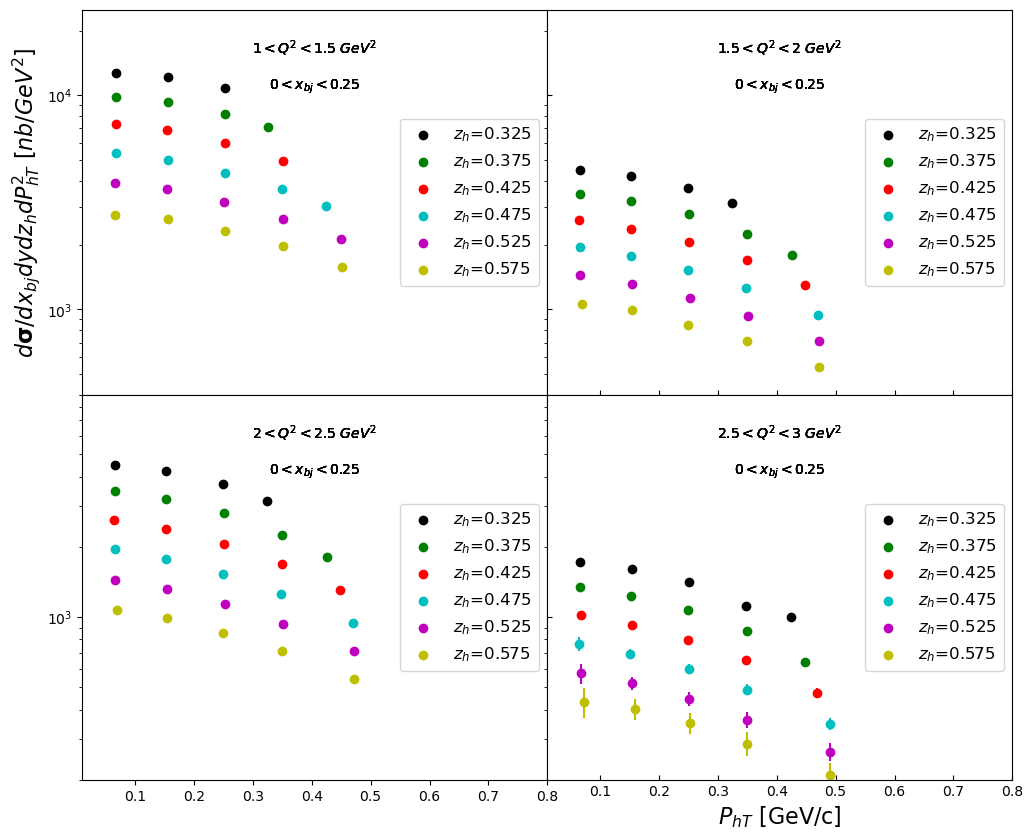

In [9]:

Q2_cuts=[1,1.5,2,2.5,3]
#Q2_cuts=[2,4,6,10,20]
#Q2_cuts=[1,3,6,10,20]
xbj_cuts=[0,0.25]
z_cuts=[0.3,0.35,0.4,0.45,0.5,0.55,0.6]
PhT_cuts=[0,0.1,0.2,0.3,0.4,0.6,0.8,1.6]
#PhT_cuts=[0,0.2,0.4,0.5,0.6,0.8,1.6]

fig, axs = plt.subplots(2,2,figsize=(12,10),sharex=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

Y_low=[400,200,100,1,1] 
Y_lim=[25111,9000,2590,1590,99,100]
plt.xlabel('$P_{hT}$ [GeV/c]',fontsize=16)
plt.xlim(0.01,0.8)
df_3xs_z_11=df_3xs_zQ2x_11[(df_3xs_zQ2x_11['Ebeam']==11)&(df_3xs_zQ2x_11['x']>xbj_cuts[0])&(df_3xs_zQ2x_11['x']<xbj_cuts[1])&(df_3xs_zQ2x_11['Q2']>Q2_cuts[0])&(df_3xs_zQ2x_11['Q2']<Q2_cuts[1])]
for i_z in range(0,len(z_cuts)-1):
    #print(z_cuts[i_z])
         
    df_3xs_11=df_3xs_z_11[(df_3xs_z_11['z']>z_cuts[i_z])&(df_3xs_z_11['z']<z_cuts[i_z+1])]
    Fuus_11=[]
    Fuu_stats_11=[]
    pTs_11=[]
    for i_PhT in range(1,len(PhT_cuts)):
        df_3xs_PhT_11=df_3xs_11[(df_3xs_11['pT']>PhT_cuts[i_PhT-1])&(df_3xs_11['pT']<PhT_cuts[i_PhT])]
        #print(len(df_3xs_PhT))
        
        _Fuu_11 = Get_weighted_average(df_3xs_PhT_11['value'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
        _Fuu_stat_11 = Get_weighted_average(df_3xs_PhT_11['value'].tolist(),df_3xs_PhT_11['stat'].tolist())[1]
        _pT_11= Get_weighted_average_phi(df_3xs_PhT_11['pT'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
        _z_11=Get_weighted_average_phi(df_3xs_PhT_11['z'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
        _Q2_11=Get_weighted_average_phi(df_3xs_PhT_11['Q2'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
        _x_11=Get_weighted_average_phi(df_3xs_PhT_11['x'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
        #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _y_11=Get_weighted_average_phi(df_3xs_PhT_11['y'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
        _sys = _Fuu_11*0.1
        Fuus_11.append(_Fuu_11)
        Fuu_stats_11.append(_Fuu_stat_11)
        pTs_11.append(_pT_11)
    legend_11=r'$z_h$='+str(round((z_cuts[i_z]+z_cuts[i_z+1])/2,3))
    axs[0][0].errorbar(pTs_11,Fuus_11,Fuu_stats_11,color=color[i_z],ls='none')
    axs[0][0].scatter(pTs_11,Fuus_11, color=color[i_z], label=legend_11)
    axs[0][0].set_ylim(Y_low[0],Y_lim[0])
    axs[0][0].set_yscale("log")
    axs[0][0].text(0.5,0.8,r'${}<x_{{bj}}<{}$'.format(xbj_cuts[0],xbj_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)
    axs[0][0].text(0.5,0.9,r'${}<Q^2<{}$ $GeV^2$'.format(Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)

df_3xs_z_11_2=df_3xs_zQ2x_11[(df_3xs_zQ2x_11['Ebeam']==11)&(df_3xs_zQ2x_11['x']>xbj_cuts[0])&(df_3xs_zQ2x_11['x']<xbj_cuts[1])&(df_3xs_zQ2x_11['Q2']>Q2_cuts[1])&(df_3xs_zQ2x_11['Q2']<Q2_cuts[2])]
for i_z in range(0,len(z_cuts)-1):
    #print(z_cuts[i_z])
         
    df_3xs_11_2=df_3xs_z_11_2[(df_3xs_z_11_2['z']>z_cuts[i_z])&(df_3xs_z_11_2['z']<z_cuts[i_z+1])]
    Fuus_11_2=[]
    Fuu_stats_11_2=[]
    pTs_11_2=[]
    for i_PhT in range(1,len(PhT_cuts)):
        df_3xs_PhT_11_2=df_3xs_11_2[(df_3xs_11_2['pT']>PhT_cuts[i_PhT-1])&(df_3xs_11_2['pT']<PhT_cuts[i_PhT])]
        #print(len(df_3xs_PhT))
        
        _Fuu_11_2 = Get_weighted_average(df_3xs_PhT_11_2['value'].tolist(),df_3xs_PhT_11_2['stat'].tolist())[0]
        _Fuu_stat_11_2 = Get_weighted_average(df_3xs_PhT_11_2['value'].tolist(),df_3xs_PhT_11_2['stat'].tolist())[1]
        _pT_11_2= Get_weighted_average_phi(df_3xs_PhT_11_2['pT'].tolist(),df_3xs_PhT_11_2['stat'].tolist())[0]
        _z_11_2=Get_weighted_average_phi(df_3xs_PhT_11_2['z'].tolist(),df_3xs_PhT_11_2['stat'].tolist())[0]
        _Q2_11_2=Get_weighted_average_phi(df_3xs_PhT_11_2['Q2'].tolist(),df_3xs_PhT_11_2['stat'].tolist())[0]
        _x_11_2=Get_weighted_average_phi(df_3xs_PhT_11_2['x'].tolist(),df_3xs_PhT_11_2['stat'].tolist())[0]
        Fuus_11_2.append(_Fuu_11_2)
        Fuu_stats_11_2.append(_Fuu_stat_11_2)
        pTs_11_2.append(_pT_11_2)
    legend_11_2=r'$z_h$='+str(round((z_cuts[i_z]+z_cuts[i_z+1])/2,3))
    axs[0][1].errorbar(pTs_11_2,Fuus_11_2,Fuu_stats_11_2,color=color[i_z],ls='none')
    axs[0][1].scatter(pTs_11_2,Fuus_11_2, color=color[i_z], label=legend_11_2)
    axs[0][1].set_ylim(Y_low[0],Y_lim[0])
    axs[0][1].set_yscale("log")
    axs[0][1].tick_params(direction='in',labelleft=False)
    axs[0][1].text(0.5,0.8,r'${}<x_{{bj}}<{}$'.format(xbj_cuts[0],xbj_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][1].transAxes)
    axs[0][1].text(0.5,0.9,r'${}<Q^2<{}$ $GeV^2$'.format(Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[0][1].transAxes)

df_3xs_z_11_3=df_3xs_zQ2x_11[(df_3xs_zQ2x_11['Ebeam']==11)&(df_3xs_zQ2x_11['x']>xbj_cuts[0])&(df_3xs_zQ2x_11['x']<xbj_cuts[1])&(df_3xs_zQ2x_11['Q2']>Q2_cuts[1])&(df_3xs_zQ2x_11['Q2']<Q2_cuts[2])]
for i_z in range(0,len(z_cuts)-1):
    #print(z_cuts[i_z])
         
    df_3xs_11_3=df_3xs_z_11_3[(df_3xs_z_11_3['z']>z_cuts[i_z])&(df_3xs_z_11_3['z']<z_cuts[i_z+1])]
    Fuus_11_3=[]
    Fuu_stats_11_3=[]
    pTs_11_3=[]
    for i_PhT in range(1,len(PhT_cuts)):
        df_3xs_PhT_11_3=df_3xs_11_3[(df_3xs_11_3['pT']>PhT_cuts[i_PhT-1])&(df_3xs_11_3['pT']<PhT_cuts[i_PhT])]
        _Fuu_11_3 = Get_weighted_average(df_3xs_PhT_11_3['value'].tolist(),df_3xs_PhT_11_3['stat'].tolist())[0]
        _Fuu_stat_11_3 = Get_weighted_average(df_3xs_PhT_11_3['value'].tolist(),df_3xs_PhT_11_3['stat'].tolist())[1]
        _pT_11_3= Get_weighted_average_phi(df_3xs_PhT_11_3['pT'].tolist(),df_3xs_PhT_11_3['stat'].tolist())[0]
        _z_11_3=Get_weighted_average_phi(df_3xs_PhT_11_3['z'].tolist(),df_3xs_PhT_11_3['stat'].tolist())[0]
        _Q2_11_3=Get_weighted_average_phi(df_3xs_PhT_11_3['Q2'].tolist(),df_3xs_PhT_11_3['stat'].tolist())[0]
        _x_11_3=Get_weighted_average_phi(df_3xs_PhT_11_3['x'].tolist(),df_3xs_PhT_11_3['stat'].tolist())[0]
        
        Fuus_11_3.append(_Fuu_11_3)
        Fuu_stats_11_3.append(_Fuu_stat_11_3)
        pTs_11_3.append(_pT_11_3)
    legend_11_3=r'$z_h$='+str(round((z_cuts[i_z]+z_cuts[i_z+1])/2,3))
    axs[1][0].errorbar(pTs_11_3,Fuus_11_3,Fuu_stats_11_3,color=color[i_z],ls='none')
    axs[1][0].scatter(pTs_11_3,Fuus_11_3, color=color[i_z], label=legend_11_3)
    axs[1][0].set_ylim(Y_low[1],Y_lim[1])
    axs[1][0].set_yscale("log")
    axs[1][0].text(0.5,0.8,r'${}<x_{{bj}}<{}$'.format(xbj_cuts[0],xbj_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][0].transAxes)
    axs[1][0].text(0.5,0.9,r'${}<Q^2<{}$ $GeV^2$'.format(Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[1][0].transAxes)

df_3xs_z_11_4=df_3xs_zQ2x_11[(df_3xs_zQ2x_11['Ebeam']==11)&(df_3xs_zQ2x_11['x']>xbj_cuts[0])&(df_3xs_zQ2x_11['x']<xbj_cuts[1])&(df_3xs_zQ2x_11['Q2']>Q2_cuts[2])&(df_3xs_zQ2x_11['Q2']<Q2_cuts[3])]
for i_z in range(0,len(z_cuts)-1):
    #print(z_cuts[i_z])
         
    df_3xs_11_4=df_3xs_z_11_4[(df_3xs_z_11_4['z']>z_cuts[i_z])&(df_3xs_z_11_4['z']<z_cuts[i_z+1])]
    Fuus_11_4=[]
    Fuu_stats_11_4=[]
    pTs_11_4=[]
    for i_PhT in range(1,len(PhT_cuts)):
        df_3xs_PhT_11_4=df_3xs_11_4[(df_3xs_11_4['pT']>PhT_cuts[i_PhT-1])&(df_3xs_11_4['pT']<PhT_cuts[i_PhT])]
        #print(len(df_3xs_PhT))
        
        _Fuu_11_4 = Get_weighted_average(df_3xs_PhT_11_4['value'].tolist(),df_3xs_PhT_11_4['stat'].tolist())[0]
        _Fuu_stat_11_4 = Get_weighted_average(df_3xs_PhT_11_4['value'].tolist(),df_3xs_PhT_11_4['stat'].tolist())[1]
        _pT_11_4= Get_weighted_average_phi(df_3xs_PhT_11_4['pT'].tolist(),df_3xs_PhT_11_4['stat'].tolist())[0]
        _z_11_4=Get_weighted_average_phi(df_3xs_PhT_11_4['z'].tolist(),df_3xs_PhT_11_4['stat'].tolist())[0]
        _Q2_11_4=Get_weighted_average_phi(df_3xs_PhT_11_4['Q2'].tolist(),df_3xs_PhT_11_4['stat'].tolist())[0]
        _x_11_4=Get_weighted_average_phi(df_3xs_PhT_11_4['x'].tolist(),df_3xs_PhT_11_4['stat'].tolist())[0]
        
        Fuus_11_4.append(_Fuu_11_4)
        Fuu_stats_11_4.append(_Fuu_stat_11_4)
        pTs_11_4.append(_pT_11_4)
    legend_11_4=r'$z_h$='+str(round((z_cuts[i_z]+z_cuts[i_z+1])/2,3))
    axs[1][1].errorbar(pTs_11_4,Fuus_11_4,Fuu_stats_11_4,color=color[i_z],ls='none')
    axs[1][1].scatter(pTs_11_4,Fuus_11_4, color=color[i_z], label=legend_11_4)
    axs[1][1].set_ylim(Y_low[1],Y_lim[1])
    axs[1][1].set_yscale("log")
    axs[1][1].tick_params(direction='in',labelleft=False)
    axs[1][1].text(0.5,0.8,r'${}<x_{{bj}}<{}$'.format(xbj_cuts[0],xbj_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][1].transAxes)
    axs[1][1].text(0.5,0.9,r'${}<Q^2<{}$ $GeV^2$'.format(Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[1][1].transAxes)

axs[0][0].set_ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
axs[0][0].legend(fontsize=12,loc='center right')
axs[0][1].legend(fontsize=12,loc='center right')
axs[1][0].legend(fontsize=12,loc='center right')
axs[1][1].legend(fontsize=12,loc='center right')
#axs[0].text(0.5,0.9,r'${}<x_{{bj}}<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(xbj_cuts[0],xbj_cuts[1],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes)
#axs[0][0].text(0.5,0.75,r'${}<x_{{b}}<{}$'.format(xbj_cuts[0],xbj_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)
plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/MAP24/11_fine_xQ2_lowQ2_log.pdf')    

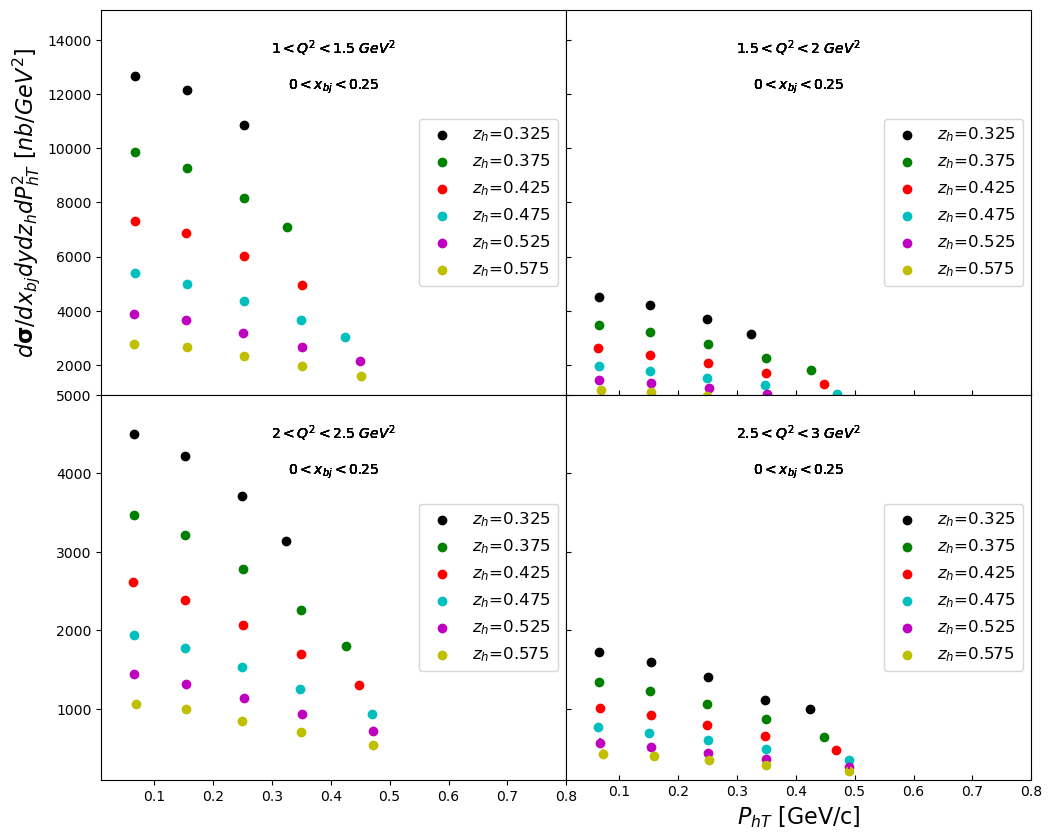

In [10]:

Q2_cuts=[1,1.5,2,2.5,3]
#Q2_cuts=[2,4,6,10,20]
#Q2_cuts=[1,3,6,10,20]
xbj_cuts=[0,0.25]
z_cuts=[0.3,0.35,0.4,0.45,0.5,0.55,0.6]
PhT_cuts=[0,0.1,0.2,0.3,0.4,0.6,0.8,1.6]
#PhT_cuts=[0,0.2,0.4,0.5,0.6,0.8,1.6]

fig, axs = plt.subplots(2,2,figsize=(12,10),sharex=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

Y_low=[900,100,100,1,1] 
Y_lim=[15111,5000,2590,1590,99,100]
plt.xlabel('$P_{hT}$ [GeV/c]',fontsize=16)
plt.xlim(0.01,0.8)
df_3xs_z_11=df_3xs_zQ2x_11[(df_3xs_zQ2x_11['Ebeam']==11)&(df_3xs_zQ2x_11['x']>xbj_cuts[0])&(df_3xs_zQ2x_11['x']<xbj_cuts[1])&(df_3xs_zQ2x_11['Q2']>Q2_cuts[0])&(df_3xs_zQ2x_11['Q2']<Q2_cuts[1])]
for i_z in range(0,len(z_cuts)-1):
    #print(z_cuts[i_z])
         
    df_3xs_11=df_3xs_z_11[(df_3xs_z_11['z']>z_cuts[i_z])&(df_3xs_z_11['z']<z_cuts[i_z+1])]
    Fuus_11=[]
    Fuu_stats_11=[]
    pTs_11=[]
    for i_PhT in range(1,len(PhT_cuts)):
        df_3xs_PhT_11=df_3xs_11[(df_3xs_11['pT']>PhT_cuts[i_PhT-1])&(df_3xs_11['pT']<PhT_cuts[i_PhT])]
        #print(len(df_3xs_PhT))
        
        _Fuu_11 = Get_weighted_average(df_3xs_PhT_11['value'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
        _Fuu_stat_11 = Get_weighted_average(df_3xs_PhT_11['value'].tolist(),df_3xs_PhT_11['stat'].tolist())[1]
        _pT_11= Get_weighted_average_phi(df_3xs_PhT_11['pT'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
        _z_11=Get_weighted_average_phi(df_3xs_PhT_11['z'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
        _Q2_11=Get_weighted_average_phi(df_3xs_PhT_11['Q2'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
        _x_11=Get_weighted_average_phi(df_3xs_PhT_11['x'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
        #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _y_11=Get_weighted_average_phi(df_3xs_PhT_11['y'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
        _sys = _Fuu_11*0.1
        Fuus_11.append(_Fuu_11)
        Fuu_stats_11.append(_Fuu_stat_11)
        pTs_11.append(_pT_11)
    legend_11=r'$z_h$='+str(round((z_cuts[i_z]+z_cuts[i_z+1])/2,3))
    axs[0][0].errorbar(pTs_11,Fuus_11,Fuu_stats_11,color=color[i_z],ls='none')
    axs[0][0].scatter(pTs_11,Fuus_11, color=color[i_z], label=legend_11)
    axs[0][0].set_ylim(Y_low[0],Y_lim[0])
    axs[0][0].text(0.5,0.8,r'${}<x_{{bj}}<{}$'.format(xbj_cuts[0],xbj_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)
    axs[0][0].text(0.5,0.9,r'${}<Q^2<{}$ $GeV^2$'.format(Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)

df_3xs_z_11_2=df_3xs_zQ2x_11[(df_3xs_zQ2x_11['Ebeam']==11)&(df_3xs_zQ2x_11['x']>xbj_cuts[0])&(df_3xs_zQ2x_11['x']<xbj_cuts[1])&(df_3xs_zQ2x_11['Q2']>Q2_cuts[1])&(df_3xs_zQ2x_11['Q2']<Q2_cuts[2])]
for i_z in range(0,len(z_cuts)-1):
    #print(z_cuts[i_z])
         
    df_3xs_11_2=df_3xs_z_11_2[(df_3xs_z_11_2['z']>z_cuts[i_z])&(df_3xs_z_11_2['z']<z_cuts[i_z+1])]
    Fuus_11_2=[]
    Fuu_stats_11_2=[]
    pTs_11_2=[]
    for i_PhT in range(1,len(PhT_cuts)):
        df_3xs_PhT_11_2=df_3xs_11_2[(df_3xs_11_2['pT']>PhT_cuts[i_PhT-1])&(df_3xs_11_2['pT']<PhT_cuts[i_PhT])]
        #print(len(df_3xs_PhT))
        
        _Fuu_11_2 = Get_weighted_average(df_3xs_PhT_11_2['value'].tolist(),df_3xs_PhT_11_2['stat'].tolist())[0]
        _Fuu_stat_11_2 = Get_weighted_average(df_3xs_PhT_11_2['value'].tolist(),df_3xs_PhT_11_2['stat'].tolist())[1]
        _pT_11_2= Get_weighted_average_phi(df_3xs_PhT_11_2['pT'].tolist(),df_3xs_PhT_11_2['stat'].tolist())[0]
        _z_11_2=Get_weighted_average_phi(df_3xs_PhT_11_2['z'].tolist(),df_3xs_PhT_11_2['stat'].tolist())[0]
        _Q2_11_2=Get_weighted_average_phi(df_3xs_PhT_11_2['Q2'].tolist(),df_3xs_PhT_11_2['stat'].tolist())[0]
        _x_11_2=Get_weighted_average_phi(df_3xs_PhT_11_2['x'].tolist(),df_3xs_PhT_11_2['stat'].tolist())[0]
        Fuus_11_2.append(_Fuu_11_2)
        Fuu_stats_11_2.append(_Fuu_stat_11_2)
        pTs_11_2.append(_pT_11_2)
    legend_11_2=r'$z_h$='+str(round((z_cuts[i_z]+z_cuts[i_z+1])/2,3))
    axs[0][1].errorbar(pTs_11_2,Fuus_11_2,Fuu_stats_11_2,color=color[i_z],ls='none')
    axs[0][1].scatter(pTs_11_2,Fuus_11_2, color=color[i_z], label=legend_11_2)
    axs[0][1].set_ylim(Y_low[0],Y_lim[0])
    axs[0][1].tick_params(direction='in',labelleft=False)
    axs[0][1].text(0.5,0.8,r'${}<x_{{bj}}<{}$'.format(xbj_cuts[0],xbj_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][1].transAxes)
    axs[0][1].text(0.5,0.9,r'${}<Q^2<{}$ $GeV^2$'.format(Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[0][1].transAxes)

df_3xs_z_11_3=df_3xs_zQ2x_11[(df_3xs_zQ2x_11['Ebeam']==11)&(df_3xs_zQ2x_11['x']>xbj_cuts[0])&(df_3xs_zQ2x_11['x']<xbj_cuts[1])&(df_3xs_zQ2x_11['Q2']>Q2_cuts[1])&(df_3xs_zQ2x_11['Q2']<Q2_cuts[2])]
for i_z in range(0,len(z_cuts)-1):
    #print(z_cuts[i_z])
         
    df_3xs_11_3=df_3xs_z_11_3[(df_3xs_z_11_3['z']>z_cuts[i_z])&(df_3xs_z_11_3['z']<z_cuts[i_z+1])]
    Fuus_11_3=[]
    Fuu_stats_11_3=[]
    pTs_11_3=[]
    for i_PhT in range(1,len(PhT_cuts)):
        df_3xs_PhT_11_3=df_3xs_11_3[(df_3xs_11_3['pT']>PhT_cuts[i_PhT-1])&(df_3xs_11_3['pT']<PhT_cuts[i_PhT])]
        _Fuu_11_3 = Get_weighted_average(df_3xs_PhT_11_3['value'].tolist(),df_3xs_PhT_11_3['stat'].tolist())[0]
        _Fuu_stat_11_3 = Get_weighted_average(df_3xs_PhT_11_3['value'].tolist(),df_3xs_PhT_11_3['stat'].tolist())[1]
        _pT_11_3= Get_weighted_average_phi(df_3xs_PhT_11_3['pT'].tolist(),df_3xs_PhT_11_3['stat'].tolist())[0]
        _z_11_3=Get_weighted_average_phi(df_3xs_PhT_11_3['z'].tolist(),df_3xs_PhT_11_3['stat'].tolist())[0]
        _Q2_11_3=Get_weighted_average_phi(df_3xs_PhT_11_3['Q2'].tolist(),df_3xs_PhT_11_3['stat'].tolist())[0]
        _x_11_3=Get_weighted_average_phi(df_3xs_PhT_11_3['x'].tolist(),df_3xs_PhT_11_3['stat'].tolist())[0]
        
        Fuus_11_3.append(_Fuu_11_3)
        Fuu_stats_11_3.append(_Fuu_stat_11_3)
        pTs_11_3.append(_pT_11_3)
    legend_11_3=r'$z_h$='+str(round((z_cuts[i_z]+z_cuts[i_z+1])/2,3))
    axs[1][0].errorbar(pTs_11_3,Fuus_11_3,Fuu_stats_11_3,color=color[i_z],ls='none')
    axs[1][0].scatter(pTs_11_3,Fuus_11_3, color=color[i_z], label=legend_11_3)
    axs[1][0].set_ylim(Y_low[1],Y_lim[1])
    axs[1][0].text(0.5,0.8,r'${}<x_{{bj}}<{}$'.format(xbj_cuts[0],xbj_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][0].transAxes)
    axs[1][0].text(0.5,0.9,r'${}<Q^2<{}$ $GeV^2$'.format(Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[1][0].transAxes)

df_3xs_z_11_4=df_3xs_zQ2x_11[(df_3xs_zQ2x_11['Ebeam']==11)&(df_3xs_zQ2x_11['x']>xbj_cuts[0])&(df_3xs_zQ2x_11['x']<xbj_cuts[1])&(df_3xs_zQ2x_11['Q2']>Q2_cuts[2])&(df_3xs_zQ2x_11['Q2']<Q2_cuts[3])]
for i_z in range(0,len(z_cuts)-1):
    #print(z_cuts[i_z])
         
    df_3xs_11_4=df_3xs_z_11_4[(df_3xs_z_11_4['z']>z_cuts[i_z])&(df_3xs_z_11_4['z']<z_cuts[i_z+1])]
    Fuus_11_4=[]
    Fuu_stats_11_4=[]
    pTs_11_4=[]
    for i_PhT in range(1,len(PhT_cuts)):
        df_3xs_PhT_11_4=df_3xs_11_4[(df_3xs_11_4['pT']>PhT_cuts[i_PhT-1])&(df_3xs_11_4['pT']<PhT_cuts[i_PhT])]
        #print(len(df_3xs_PhT))
        
        _Fuu_11_4 = Get_weighted_average(df_3xs_PhT_11_4['value'].tolist(),df_3xs_PhT_11_4['stat'].tolist())[0]
        _Fuu_stat_11_4 = Get_weighted_average(df_3xs_PhT_11_4['value'].tolist(),df_3xs_PhT_11_4['stat'].tolist())[1]
        _pT_11_4= Get_weighted_average_phi(df_3xs_PhT_11_4['pT'].tolist(),df_3xs_PhT_11_4['stat'].tolist())[0]
        _z_11_4=Get_weighted_average_phi(df_3xs_PhT_11_4['z'].tolist(),df_3xs_PhT_11_4['stat'].tolist())[0]
        _Q2_11_4=Get_weighted_average_phi(df_3xs_PhT_11_4['Q2'].tolist(),df_3xs_PhT_11_4['stat'].tolist())[0]
        _x_11_4=Get_weighted_average_phi(df_3xs_PhT_11_4['x'].tolist(),df_3xs_PhT_11_4['stat'].tolist())[0]
        
        Fuus_11_4.append(_Fuu_11_4)
        Fuu_stats_11_4.append(_Fuu_stat_11_4)
        pTs_11_4.append(_pT_11_4)
    legend_11_4=r'$z_h$='+str(round((z_cuts[i_z]+z_cuts[i_z+1])/2,3))
    axs[1][1].errorbar(pTs_11_4,Fuus_11_4,Fuu_stats_11_4,color=color[i_z],ls='none')
    axs[1][1].scatter(pTs_11_4,Fuus_11_4, color=color[i_z], label=legend_11_4)
    axs[1][1].set_ylim(Y_low[1],Y_lim[1])
    axs[1][1].tick_params(direction='in',labelleft=False)
    axs[1][1].text(0.5,0.8,r'${}<x_{{bj}}<{}$'.format(xbj_cuts[0],xbj_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][1].transAxes)
    axs[1][1].text(0.5,0.9,r'${}<Q^2<{}$ $GeV^2$'.format(Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[1][1].transAxes)

axs[0][0].set_ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
axs[0][0].legend(fontsize=12,loc='center right')
axs[0][1].legend(fontsize=12,loc='center right')
axs[1][0].legend(fontsize=12,loc='center right')
axs[1][1].legend(fontsize=12,loc='center right')
#axs[0].text(0.5,0.9,r'${}<x_{{bj}}<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(xbj_cuts[0],xbj_cuts[1],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes)
#axs[0][0].text(0.5,0.75,r'${}<x_{{b}}<{}$'.format(xbj_cuts[0],xbj_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)
plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/MAP24/11_fine_xQ2_lowQ2.pdf')    